## Helper: visualize a single xyt configuration

In [ ]:
## Imports
import sys
sys.path.insert(0, '../core')

import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

import kaggle_support as kgs
import importlib
importlib.reload(kgs)
dat = kgs.dill_load(kgs.temp_dir + 'ga_multi_tree_26_to_29.pickle')

local


In [2]:
ga = dat.ga.ga_list[-1].ga_list[0]

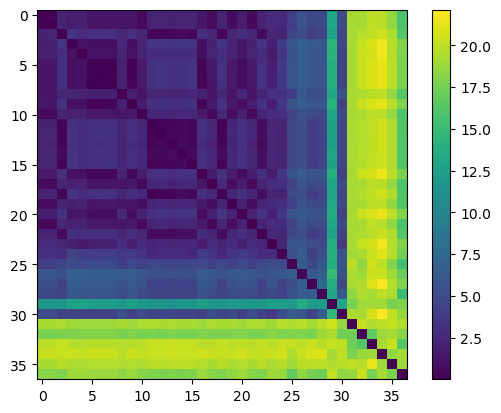

In [ ]:
import lap_batch
auction_cfg = lap_batch.LAPConfig(
    algorithm='min_cost_col',
 )
mat1 = kgs.compute_genetic_diversity_matrix(ga.population.phenotype.xyt, ga.population.phenotype.xyt, lap_config=auction_cfg, allow_shortcut= False)
plt.imshow(mat1.get())
plt.colorbar()

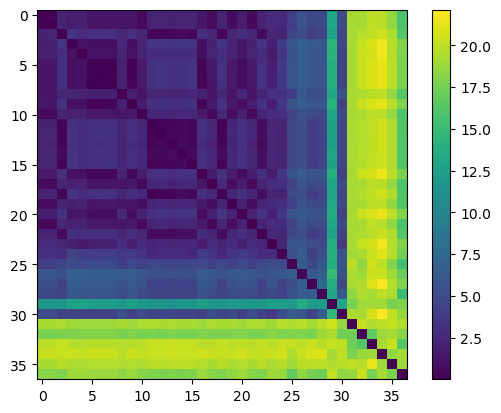

In [ ]:
import lap_batch

auction_cfg = lap_batch.LAPConfig(
    algorithm='min_cost_col',
 )

mat2 = kgs.compute_genetic_diversity_matrix(
    ga.population.phenotype.xyt,
    ga.population.phenotype.xyt,
    lap_config=auction_cfg,
    allow_shortcut= True
 )
plt.imshow(mat2.get())
plt.colorbar()

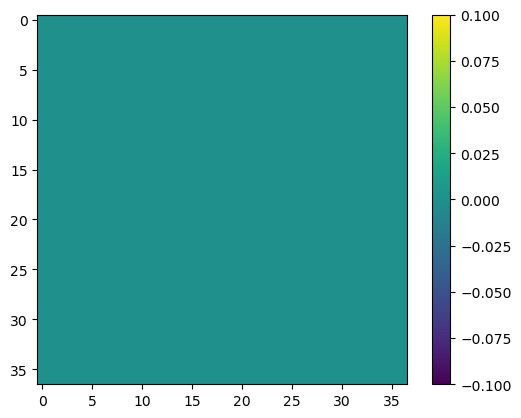

In [5]:
plt.imshow( ((mat2-mat1)/(mat2+mat1)).get() )
plt.colorbar()